# Final Exercise

Now, we are going to put together everything we have learned over the last two days to analyze and plot some data about wild salmon. This data is in two files: 

1. `salmon_catch_data.csv`, contains data about salmon caught on a boat, including the common name, length (mm) and weight (g).
2. `salmon_mercury.csv`, contains yearly average mercury contents for several salmon species in ppm.

We are first going to deal with the length and weight data. In the cell below, import the data using [`numpy.genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)

Hint: Open the data file and see what it looks like (column names, data types, column order).

In [34]:
import numpy as np 

id, name, length, weight = np.genfromtxt('salmon_catch_data.csv', delimiter = ',', unpack = True, skip_header = True, dtype=None)

print(name)

[b'Chinook salmon' b'Sockeye salmon' b'Sockeye salmon' b'Steelhead'
 b'Steelhead' b'Chinook salmon' b'Sockeye salmon' b'Steelhead'
 b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead'
 b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead'
 b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead'
 b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead'
 b'Steelhead' b'Steelhead' b'Steelhead' b'Chinook salmon'
 b'Chinook salmon' b'Sockeye salmon' b'Chinook salmon' b'Chinook salmon'
 b'Sockeye salmon' b'Steelhead' b'Steelhead' b'Steelhead' b'Steelhead'
 b'Steelhead' b'Steelhead' b'Chinook salmon' b'Chinook salmon'
 b'Chinook salmon' b'Chinook salmon' b'Chinook salmon' b'Chinook salmon'
 b'Chinook salmon' b'Chinook salmon' b'Steelhead' b'Coho salmon'
 b'Coho salmon' b'Chinook salmon' b'Chinook salmon' b'Chinook salmon'
 b'Chinook salmon' b'Chinook salmon' b'Chinook salmon' b'Chinook salmon'
 b'Sockeye salmon' b'Sockeye salmon' b'Sockeye salmon' b'So

C:\Users\Claire\AppData\Local\Temp\ipykernel_12960\1676961461.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  id, name, length, weight = np.genfromtxt('salmon_catch_data.csv', delimiter = ',', unpack = True, skip_header = True, dtype=None)


## Counting Salmon Species

You will notice that this data includes a number of different sub-species of salmon. Use the `set` data type to find all fo the unique values in the array of common names. Print this set to see the unique salmon names in this dataset - you should see 4 sub-species appear.

In [3]:
unique_names = set(name)
print(unique_names)

{b'Sockeye salmon', b'Chinook salmon', b'Steelhead', b'Coho salmon'}


We want to make a bar plot of the quantities of salmon caught in each sub-species. In the code box below, write some code that counts the number of each sub-species.

Hint: There are several ways to do this. One way would be to initialize "counter" variables for each sub-species at 0, then use a for loop to iterate through the list of names and add to the appropriate counter in ever loop. A "slicker" way of doing this would be to use the [`count()`](https://docs.python.org/3/tutorial/datastructures.html) function - but note that this method applies to lists, not arrays.

Save these counts as a list of integers.

In [4]:
steelhead_count = list(name).count(b'Steelhead')
coho_count = list(name).count(b'Coho salmon')
chinook_count = list(name).count(b'Chinook salmon')
sockeye_count = list(name).count(b'Sockeye salmon')

print(steelhead_count, coho_count, chinook_count, sockeye_count)

count_list = [steelhead_count, coho_count, chinook_count, sockeye_count]

41 2 46 11


Let's make a bar plot of the count of each type of salmon. For this, we will use the [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function from `matplotlib.pyplot`. First, let's generate the data we want to plot. The first will be a list of the names of salmon (as strings). On the vertical axis, we will use a list of the counts for each species, which we generated previously. 

Now, make your plot nice: add color, add a title, and add a vertical axis label.

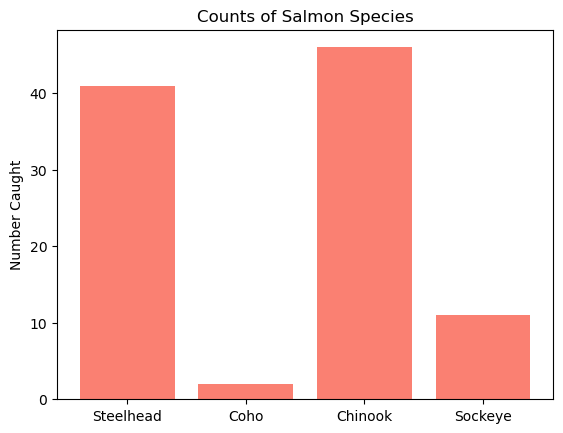

In [5]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.bar(['Steelhead', 'Coho', 'Chinook', 'Sockeye'],count_list, color = 'salmon')
ax1.set_title('Counts of Salmon Species')
ax1.set_ylabel('Number Caught')
plt.show()

## Length vs Weight 

Next, we want to make a plot of length vs weight for our salmon. If you take a look at the data, you'll notice that weight data was only collected for a subset of the Chinook salmon caught. This is reflective of real-life scientific data: it may be messy and incomplete, but we can still extract some good information from it.

We want to plot the data for the salmon which have both weight AND height data. Use a for loop to generate new lists and extract this information. you can then print the contents of the lists to check if you have extracted the correct information.

Hint: the tricky part is figuring out how to separate the "nan" values from the numbers. You will note that the "nan" values are actually floats (you can check by printing their type). One way you can distinguish the real numerical values from the floats is by using the condition "> 0 applied to the elements of the list of weights.

In [ ]:
chinook_length = []
chinook_weight = []

for i in range(len(length)):
    if weight[i] > 0:
        chinook_weight.append(weight[i])
        chinook_length.append(length[i])

print(chinook_length) 
print(chinook_weight)


[147, 444, 422, 173, 145, 150, 155, 192, 275, 137, 165, 147, 151, 142, 148, 145, 142, 155, 142]
[25.6, 1011.7, 902.4, 50.7, 26.6, 27.4, 32.2, 78.0, 268.7, 23.5, 43.0, 29.3, 28.4, 25.5, 24.4, 28.6, 20.7, 30.8, 23.1]


Now, we want to make a scatter plot of this reduced data using the [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) function. 

Remember to add a title and axis labels, and choose a fun color and marker shape!

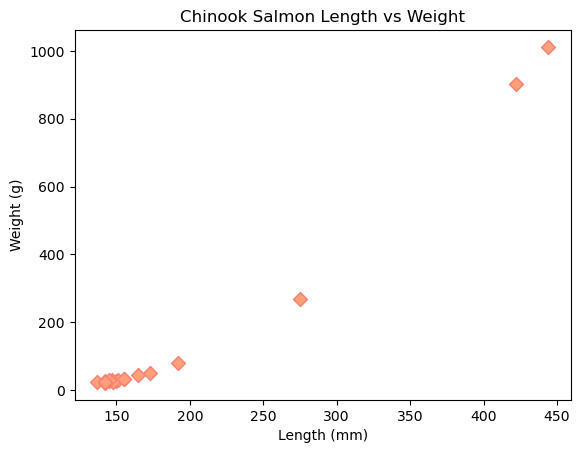

In [7]:
fig, ax = plt.subplots()
ax.scatter(chinook_length, chinook_weight, c = 'lightsalmon', edgecolor = 'salmon', s = 50, marker = 'D')
ax.set_title('Chinook Salmon Length vs Weight')
ax.set_xlabel('Length (mm)')
ax.set_ylabel('Weight (g)')
plt.show()

## Box Plots



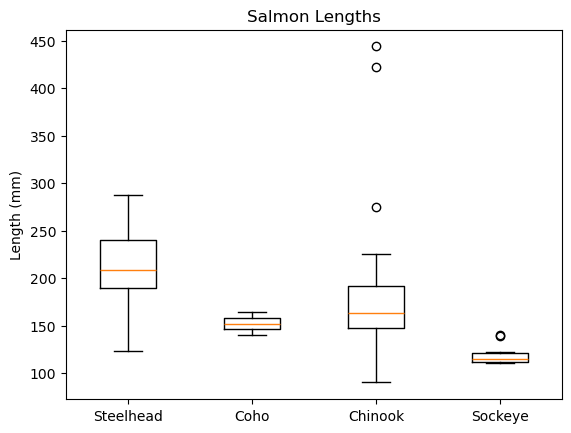

In [ ]:
steelhead = []
coho = []
chinook = []
sockeye = []

for i in range(len(name)):
    if name[i] == b'Steelhead':
        steelhead.append(length[i])
    elif name[i] == b'Coho salmon':
        coho.append(length[i])
    elif name[i] == b'Chinook salmon':
        chinook.append(length[i])
    else:
        sockeye.append(length[i])

fig, ax1 = plt.subplots()

x = ['Steelhead', 'Coho', 'Chinook', 'Sockeye']
y = [steelhead, coho, chinook, sockeye]

ax1.boxplot(y, labels = x)

ax1.set_ylabel("Length (mm)")
ax1.set_title("Salmon Lengths")

plt.show()